<h1><strong><u>California Housing Market Model</u></strong></h1>

In [19]:
from sklearn.datasets import fetch_california_housing
from mglearn.datasets import load_extended_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

<h2><strong><u>Data Preprocessing</u></strong></h2>

<h3><u>Data Loading</u></h3>

In [20]:
data = fetch_california_housing(as_frame=True)

In [21]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [22]:
X = data.data
y = data.target

In [23]:
features = X.columns
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


<h3><u>Data Visualization</u></h3>

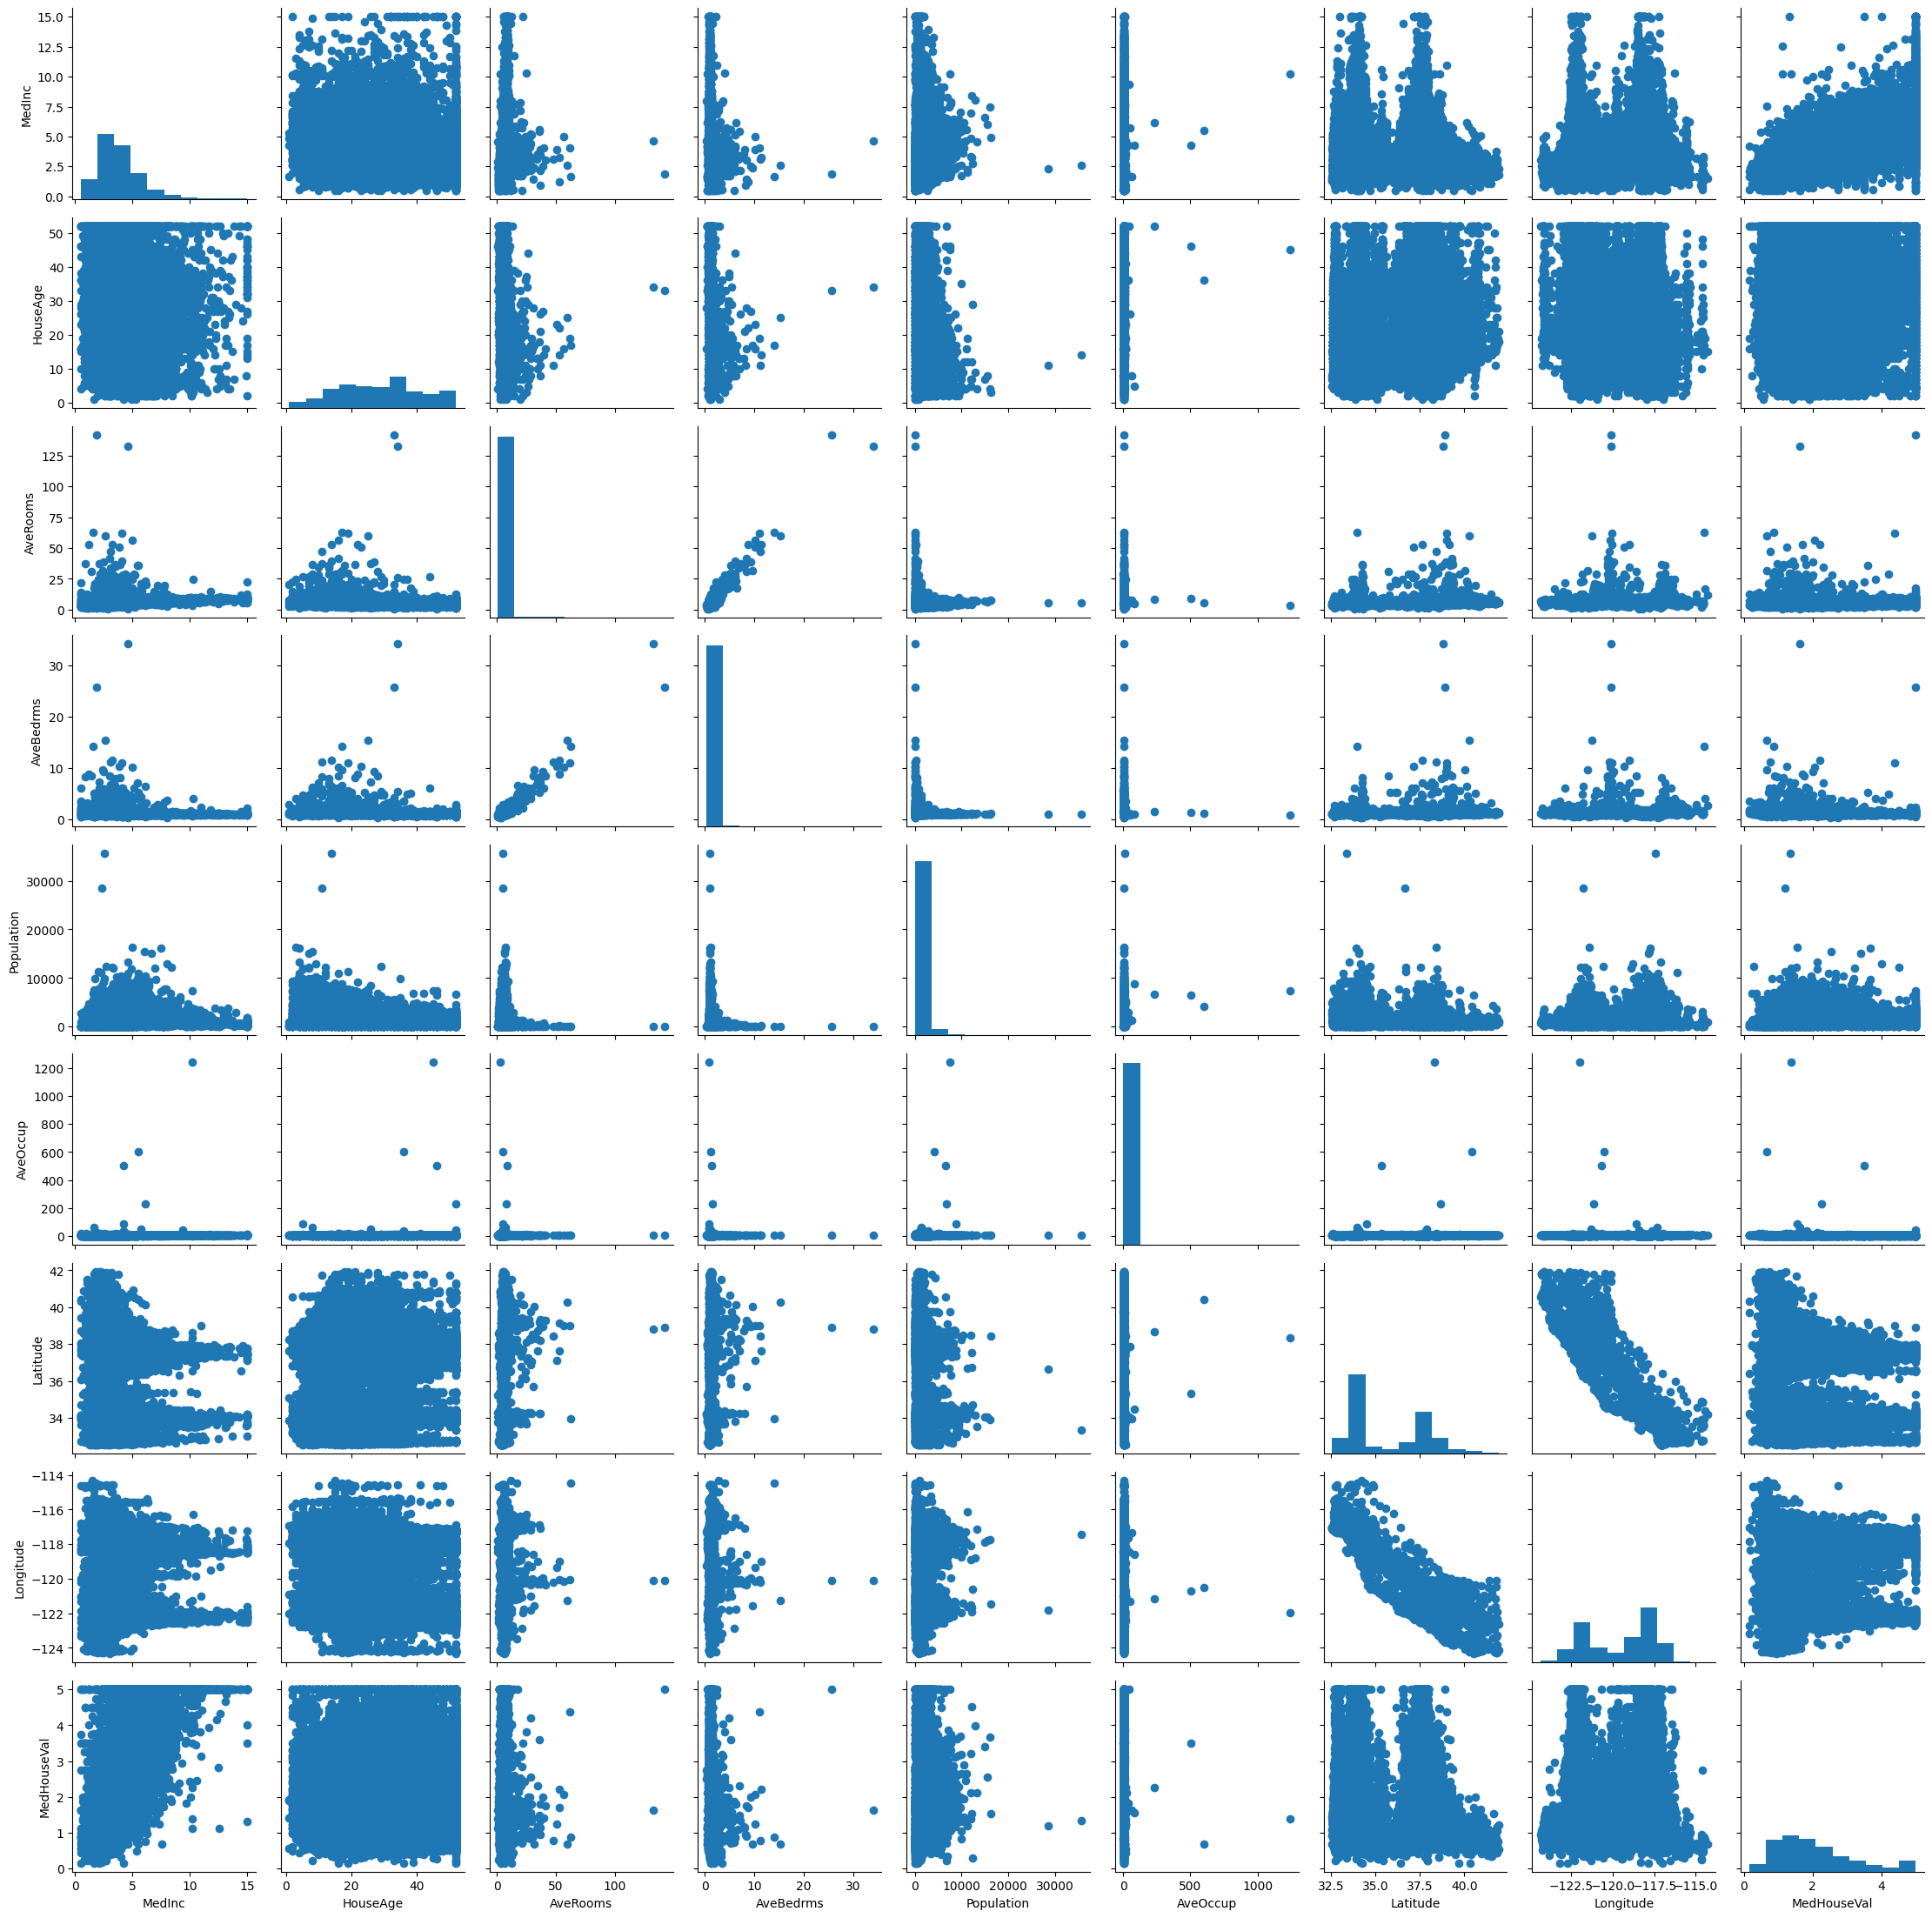

In [24]:
graphs = sns.PairGrid(data.frame)
graphs.map_diag(plt.hist)
graphs.map_offdiag(plt.scatter)

<h3><u>Feature Scaling</u></h3>

In [25]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=features)
X_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


<h3><u>Statistical Inference</u></h3>

In [26]:
const = sm.add_constant(X)
model = sm.OLS(y, const).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:06:06   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
const = sm.add_constant(X_scaled)
model = sm.OLS(y, const).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:06:06   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0686      0.005    410.326      0.000       2.059       2.078
MedInc         0.8296      0.008    104.054      0.000       0.814       0.845
HouseAge       0.1188      0.006     21.143      0.000       0.108       0.130
AveRooms      -0.2655      0.015    -18.235      0.000      -0.294      -0.237
AveBedrms      0.3057      0.013     22.928      0.000       0.280       0.332
Population    -0.0045      0.005     -0.837      0.402      -0.015       0.006
AveOccup      -0.0393      0.005     -7.769      0.000      -0.049      -0.029
Latitude      -0.8999      0.015    -58.541      0.000      -0.930      -0.870
Longitude     -0.8705      0.015    -57.682      0.000      -0.900      -0.841
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3><u>Data Preparation</u></h3>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [29]:
display(X_train.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10096,3.8194,34.0,5.034130,1.088737,698.0,2.382253,33.93,-117.94
7835,3.3182,35.0,3.904762,0.789116,610.0,4.149660,33.91,-118.15
13526,4.3676,28.0,6.392857,1.011905,1304.0,3.104762,34.18,-117.30
10224,3.0893,25.0,3.835476,1.128535,755.0,1.940874,33.87,-117.89
17037,4.2240,43.0,5.655098,1.034707,1225.0,2.657267,37.49,-122.25


<h2><strong><u>Linear Regression Model</u></strong></h2>

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
print(lr.coef_)

[ 4.35713259e-01  9.00912850e-03 -1.07799405e-01  6.04021588e-01
 -3.32278166e-06 -7.87351384e-03 -4.20495529e-01 -4.32400412e-01]


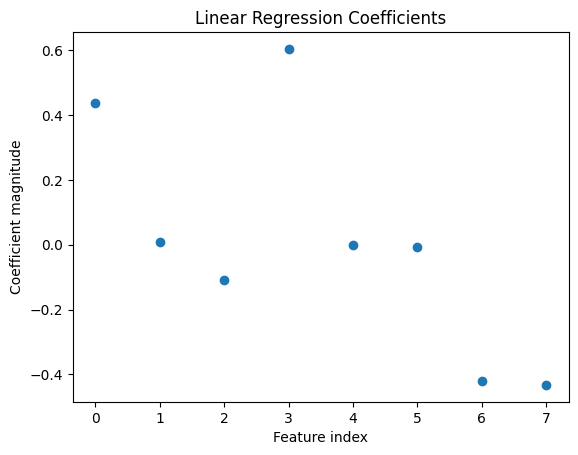

In [32]:
plt.scatter(range(len(lr.coef_)), lr.coef_)
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
plt.title("Linear Regression Coefficients")
plt.show()

In [33]:
training_predictions = lr.predict(X_train)
mse = mean_squared_error(y_train, training_predictions)
mae = mean_absolute_error(y_train, training_predictions)
print(f"Training MAE: {mae:.3f}")
r2 = lr.score(X_train, y_train)
print(f"Training R^2: {r2:.3f}")
rsme = np.sqrt(mse)
avg_target = np.mean(y_train)
std_target = np.std(y_train)
print(f"Target standard deviation: {std_target:.3f}")
print(f"Training RSME: {rsme:.3f}")
print(f"Average target value: {avg_target:.3f}")
target_range = y_train.max() - y_train.min()
print(f"Target range: {target_range:.3f}")
train_percentage = (rsme / avg_target) * 100
print(f"RSME as percentage of average target: {train_percentage:.2f}%")
print("RMSE over target range: {:.2f}".format((rsme / target_range)))
print("RMSE over target std dev: {:.2f}".format((rsme / std_target)))



Training MAE: 0.530
Training R^2: 0.601
Target standard deviation: 1.151
Training RSME: 0.727
Average target value: 2.067
Target range: 4.850
RSME as percentage of average target: 35.18%
RMSE over target range: 0.15
RMSE over target std dev: 0.63


In [34]:
print(X_train.shape)
print(len(y_train))
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f"Adjusted R^2: {adj_r2:.3f}")

(15480, 8)
15480
Adjusted R^2: 0.601


In [35]:
# testing predictions
# testing_predictions = lr.predict(X_test)
# mse_test = mean_squared_error(y_test, testing_predictions)
# rmse_test = np.sqrt(mean_squared_error(y_test, testing_predictions))
# mae_test = mean_absolute_error(y_test, testing_predictions)
# print(f"\nTesting MAE: {mae_test:.3f}")
# r2_test = lr.score(X_test, y_test)
# print(f"Testing R^2: {r2_test:.3f}")
# print(f"Testing RSME: {rmse_test:.3f}")
# avg_target = np.mean(y_test)
# std_target = np.std(y_test)
# print(f"Target standard deviation: {std_target:.3f}")
# print(f"Average target value: {avg_target:.3f}")
# target_range = y_test.max() - y_test.min()
# print(f"Target range: {target_range:.3f}")
# test_percentage = (rmse_test / avg_target) * 100
# print(f"RSME as percentage of average target: {test_percentage:.2f}%")
# print("RMSE over target range: {:.2f}".format((rmse_test / target_range)))
# print("RMSE over target std dev: {:.2f}".format((rmse_test / std_target)))

<h2><strong><u>Lasso Regression Model</u></strong></h2>

In [36]:
lr = Lasso()
lr.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [37]:
print(lr.coef_)

[ 1.41830499e-01  5.74146679e-03  0.00000000e+00 -0.00000000e+00
 -2.17763527e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


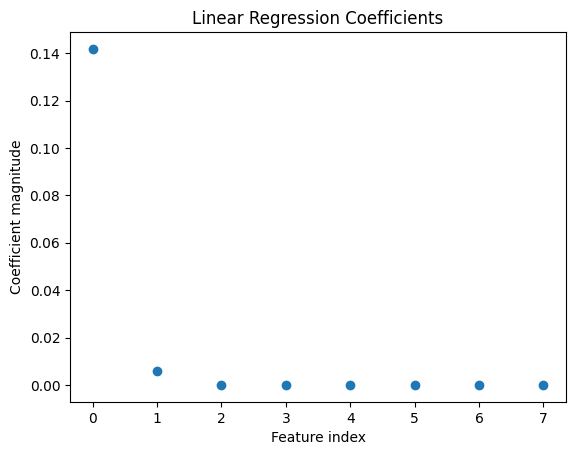

In [38]:
plt.scatter(range(len(lr.coef_)), lr.coef_)
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
plt.title("Linear Regression Coefficients")
plt.show()

In [39]:
training_predictions = lr.predict(X_train)
mse = mean_squared_error(y_train, training_predictions)
mae = mean_absolute_error(y_train, training_predictions)
print(f"Training MAE: {mae:.3f}")
r2 = lr.score(X_train, y_train)
print(f"Training R^2: {r2:.3f}")
rsme = np.sqrt(mse)
avg_target = np.mean(y_train)
std_target = np.std(y_train)
print(f"Target standard deviation: {std_target:.3f}")
print(f"Training RSME: {rsme:.3f}")
print(f"Average target value: {avg_target:.3f}")
target_range = y_train.max() - y_train.min()
print(f"Target range: {target_range:.3f}")
train_percentage = (rsme / avg_target) * 100
print(f"RSME as percentage of average target: {train_percentage:.2f}%")
print("RMSE over target range: {:.2f}".format((rsme / target_range)))
print("RMSE over target std dev: {:.2f}".format((rsme / std_target)))



Training MAE: 0.768
Training R^2: 0.277
Target standard deviation: 1.151
Training RSME: 0.979
Average target value: 2.067
Target range: 4.850
RSME as percentage of average target: 47.34%
RMSE over target range: 0.20
RMSE over target std dev: 0.85


In [40]:
print(X_train.shape)
print(len(y_train))
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f"Adjusted R^2: {adj_r2:.3f}")

(15480, 8)
15480
Adjusted R^2: 0.277


In [41]:
# testing predictions
# testing_predictions = lr.predict(X_test)
# mse_test = mean_squared_error(y_test, testing_predictions)
# rmse_test = np.sqrt(mean_squared_error(y_test, testing_predictions))
# mae_test = mean_absolute_error(y_test, testing_predictions)
# print(f"\nTesting MAE: {mae_test:.3f}")
# r2_test = lr.score(X_test, y_test)
# print(f"Testing R^2: {r2_test:.3f}")
# print(f"Testing RSME: {rmse_test:.3f}")
# avg_target = np.mean(y_test)
# std_target = np.std(y_test)
# print(f"Target standard deviation: {std_target:.3f}")
# print(f"Average target value: {avg_target:.3f}")
# target_range = y_test.max() - y_test.min()
# print(f"Target range: {target_range:.3f}")
# test_percentage = (rmse_test / avg_target) * 100
# print(f"RSME as percentage of average target: {test_percentage:.2f}%")
# print("RMSE over target range: {:.2f}".format((rmse_test / target_range)))
# print("RMSE over target std dev: {:.2f}".format((rmse_test / std_target)))

<h2><strong><u>Ridge Regression Model</u></strong></h2>

In [42]:
lr = Ridge()
lr.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [43]:
print(lr.coef_)

[ 4.35588266e-01  9.01142450e-03 -1.07561866e-01  6.02811148e-01
 -3.31238232e-06 -7.87572544e-03 -4.20473943e-01 -4.32360640e-01]


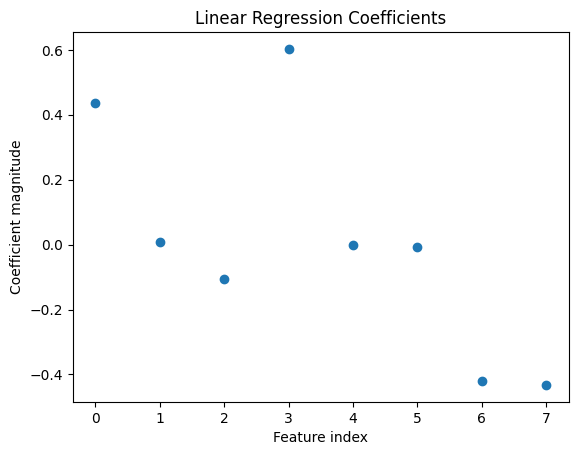

In [44]:
plt.scatter(range(len(lr.coef_)), lr.coef_)
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
plt.title("Linear Regression Coefficients")
plt.show()

In [45]:
training_predictions = lr.predict(X_train)
mse = mean_squared_error(y_train, training_predictions)
mae = mean_absolute_error(y_train, training_predictions)
print(f"Training MAE: {mae:.3f}")
r2 = lr.score(X_train, y_train)
print(f"Training R^2: {r2:.3f}")
rsme = np.sqrt(mse)
avg_target = np.mean(y_train)
std_target = np.std(y_train)
print(f"Target standard deviation: {std_target:.3f}")
print(f"Training RSME: {rsme:.3f}")
print(f"Average target value: {avg_target:.3f}")
target_range = y_train.max() - y_train.min()
print(f"Target range: {target_range:.3f}")
train_percentage = (rsme / avg_target) * 100
print(f"RSME as percentage of average target: {train_percentage:.2f}%")
print("RMSE over target range: {:.2f}".format((rsme / target_range)))
print("RMSE over target std dev: {:.2f}".format((rsme / std_target)))



Training MAE: 0.530
Training R^2: 0.601
Target standard deviation: 1.151
Training RSME: 0.727
Average target value: 2.067
Target range: 4.850
RSME as percentage of average target: 35.18%
RMSE over target range: 0.15
RMSE over target std dev: 0.63


In [46]:
print(X_train.shape)
print(len(y_train))
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f"Adjusted R^2: {adj_r2:.3f}")

(15480, 8)
15480
Adjusted R^2: 0.601


In [47]:
# testing predictions
# testing_predictions = lr.predict(X_test)
# mse_test = mean_squared_error(y_test, testing_predictions)
# rmse_test = np.sqrt(mean_squared_error(y_test, testing_predictions))
# mae_test = mean_absolute_error(y_test, testing_predictions)
# print(f"\nTesting MAE: {mae_test:.3f}")
# r2_test = lr.score(X_test, y_test)
# print(f"Testing R^2: {r2_test:.3f}")
# print(f"Testing RSME: {rmse_test:.3f}")
# avg_target = np.mean(y_test)
# std_target = np.std(y_test)
# print(f"Target standard deviation: {std_target:.3f}")
# print(f"Average target value: {avg_target:.3f}")
# target_range = y_test.max() - y_test.min()
# print(f"Target range: {target_range:.3f}")
# test_percentage = (rmse_test / avg_target) * 100
# print(f"RSME as percentage of average target: {test_percentage:.2f}%")
# print("RMSE over target range: {:.2f}".format((rmse_test / target_range)))
# print("RMSE over target std dev: {:.2f}".format((rmse_test / std_target)))